# Correct-out astrophysical variability of nova V606 Vul with RegressionCorrector

This notebook is created to address the referee's comments on the paper "TESS photometry of the nova eruption in V606 Vul: asymmetric photosphere and multiple ejections?" ([arXiv e-print](https://arxiv.org/abs/2311.04903)) submitted to ApJ. It illustrates how easily high-amplitude astrophysical variability can be corrected-out by blindly following a tutorial aimed at exoplanet lightcurve analysis.

We apply the tutorial https://docs.lightkurve.org/tutorials/2-creating-light-curves/2-3-removing-scattered-light-using-regressioncorrector.html to TESS Sector 41 observations of Galactic nova V606 Vul to see what happens when RegressionCorrector is applied to this lightcurve. The trick is that V606 Vul is bright and showing high-aplitude irregular variability in addition to a low-amplitude (but still clearly visible in the raw ligtcurve) periodic signal.

*Do not follow this notebook for actual data analysis!!!*

This notebook aims to show how *not* to do things.

In [1]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
target = "V606 Vul"  # Galactic nova that erupted in 2021 (TESS Sector 41)
tpf = lk.search_tesscut(target, sector=41).download(cutout_size=(50, 50))

In [3]:
tpf

TessTargetPixelFile(TICID: V606 Vul)

In [4]:
aper = tpf.create_threshold_mask()

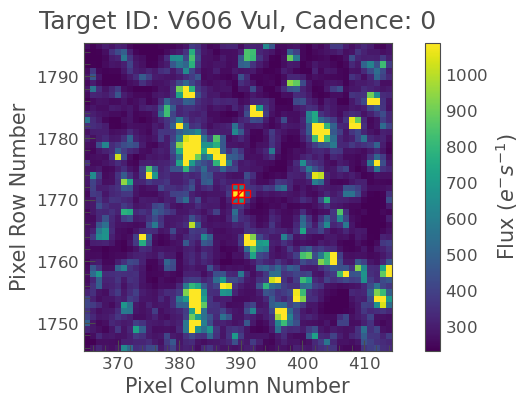

In [5]:
tpf.plot(aperture_mask=aper);

In [6]:
uncorrected_lc = tpf.to_lightcurve(aperture_mask=aper)

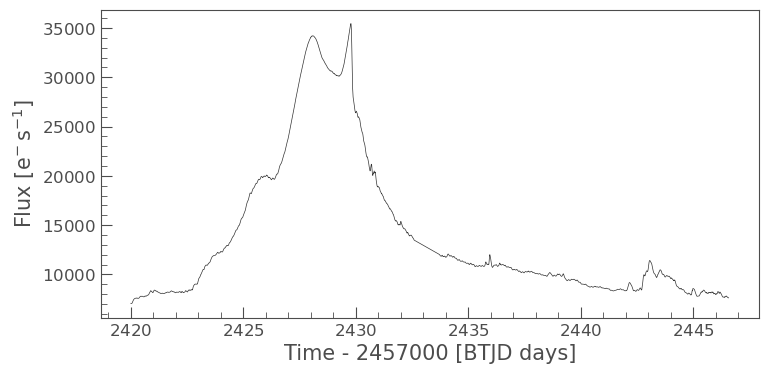

In [7]:
uncorrected_lc.plot();

In [8]:
regressors = tpf.flux[:, ~aper]

In [9]:
regressors.shape

(3658, 2493)

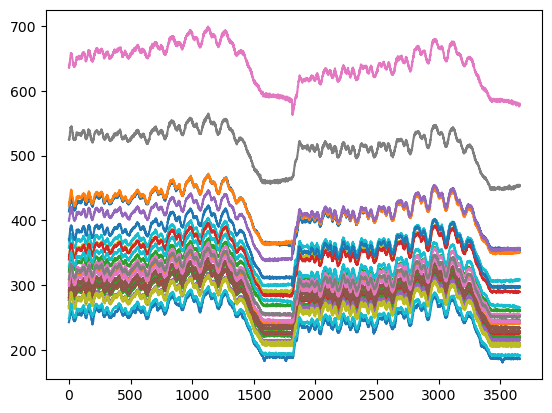

In [10]:
plt.plot(regressors[:, :30]);

In [11]:
from lightkurve.correctors import DesignMatrix
dm = DesignMatrix(regressors, name='regressors')

In [12]:
dm

regressors DesignMatrix (3658, 2493)

In [13]:
dm = dm.pca(5)

In [14]:
dm

regressors DesignMatrix (3658, 5)

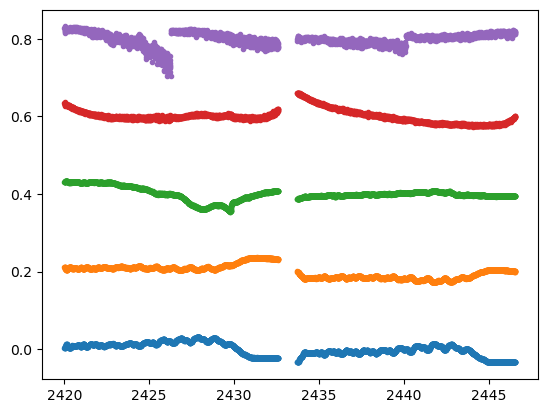

In [15]:
plt.plot(tpf.time.value, dm.values + np.arange(5)*0.2, '.');

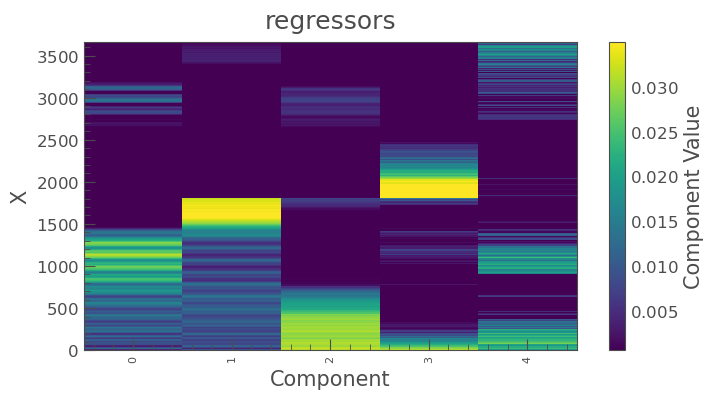

In [16]:
dm.plot();

In [17]:
dm = dm.append_constant()

In [18]:
from lightkurve.correctors import RegressionCorrector
corrector = RegressionCorrector(uncorrected_lc)

In [19]:
corrector

RegressionCorrector (ID: V606 Vul)

In [20]:
corrected_lc = corrector.correct(dm)

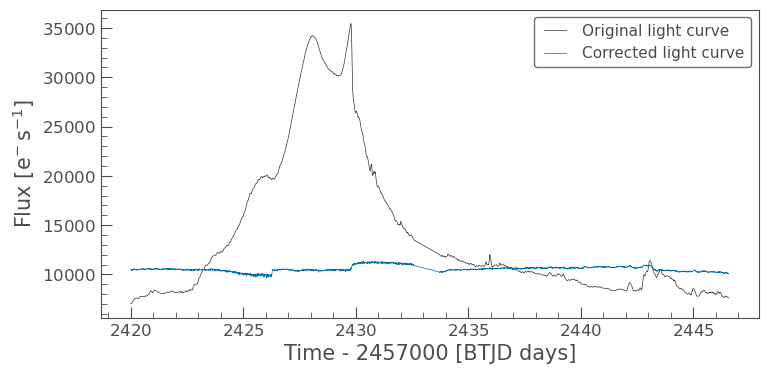

In [21]:
ax = uncorrected_lc.plot(label='Original light curve')
corrected_lc.plot(ax=ax, label='Corrected light curve');

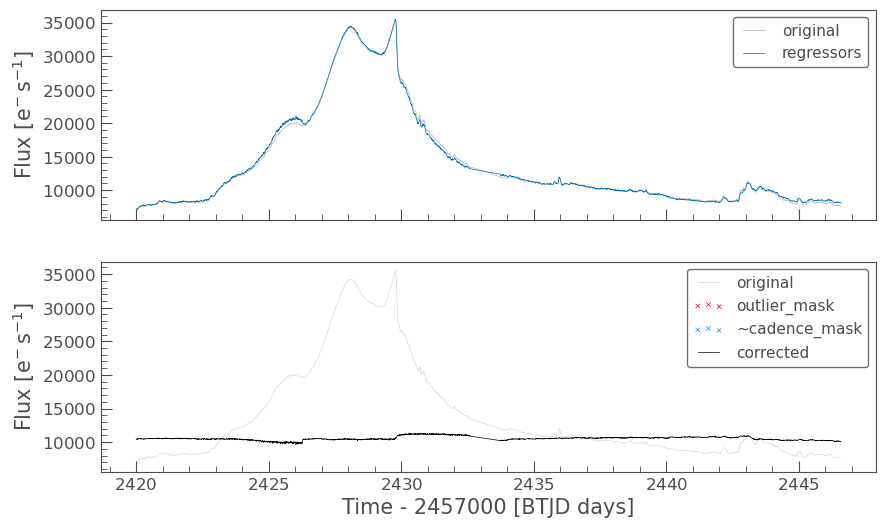

In [22]:
corrector.diagnose();

In [23]:
corrector.model_lc

time,flux,flux_err
,electron / s,electron / s
Time,float64,float64
2420.0006367159403,-3418.025218593415,0.0
2420.0075813185713,-3432.3520351759407,0.0
2420.014525921202,-3415.332961230326,0.0
2420.021470523833,-3440.9946004567373,0.0
2420.0284151259984,-3423.1908767161312,0.0
2420.0353597281637,-3340.0786925109223,0.0
2420.042304330329,-3441.6184842063276,0.0
2420.0492489320286,-3382.5309873797214,0.0


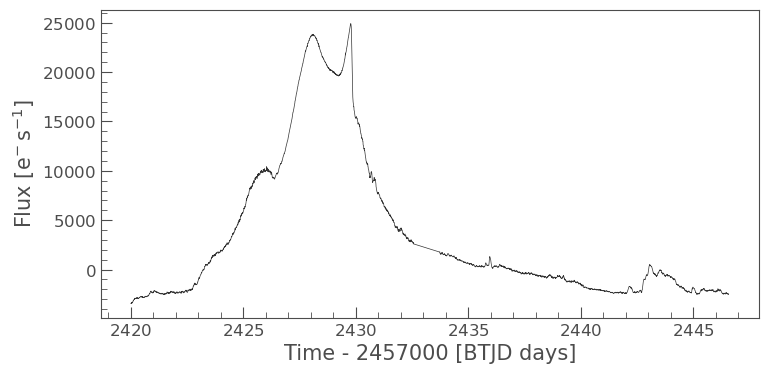

In [24]:
model = corrector.model_lc
model.plot();

In [25]:
# Normalize to the 5th percentile of model flux
model -= np.percentile(model.flux, 5)

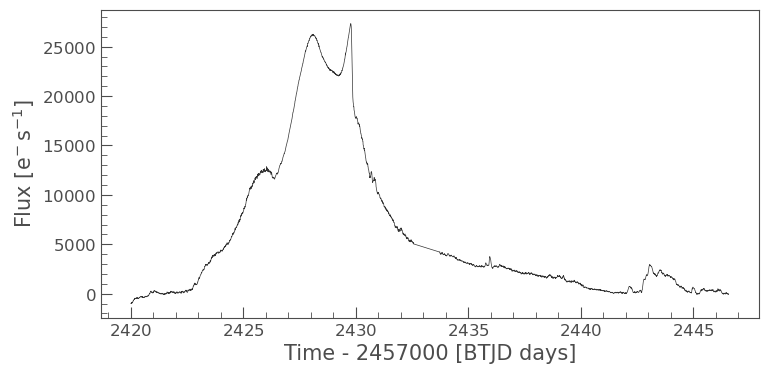

In [26]:
model.plot();

In [27]:
corrected_lc = uncorrected_lc - model

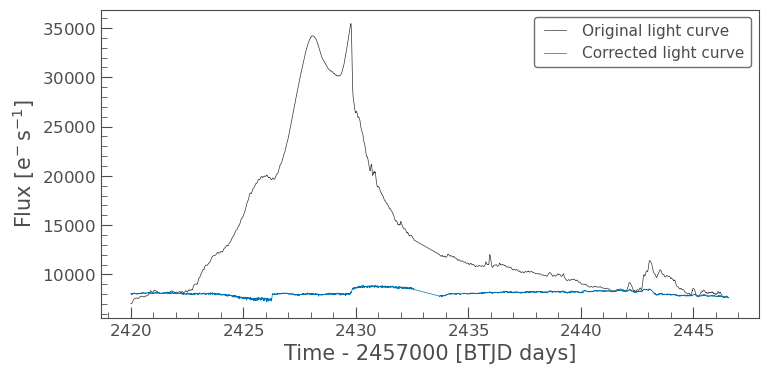

In [28]:
ax = uncorrected_lc.plot(label='Original light curve')
corrected_lc.plot(ax=ax, label='Corrected light curve');